In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funcs.ipc import *
%matplotlib inline

In [2]:
RECALCULATION = False  # True if you want to recalculate the values of IPC

N = 1000
g = 0.6
eta = 0.5
sigma_n = 0.
sigma_s = 1.
degree_list = [1,3,5,7,9]
max_leadout = 50
trial = 10
act_func = np.tanh
Tobs = 100000
Tinit = 1000

In [3]:
if RECALCULATION:
    ipc_list = np.zeros([trial, max_leadout, len(degree_list)])

    for num in range(trial):
        ipc_list[num,:,:] = calc_ipc(N, g, sigma_s, max_leadout, degree_list, Tobs, Tinit, act_func, sigma_n, connectivity="Correlated", eta=eta)
        
    np.save("data/ipc_reciprocal.npy", ipc_list)

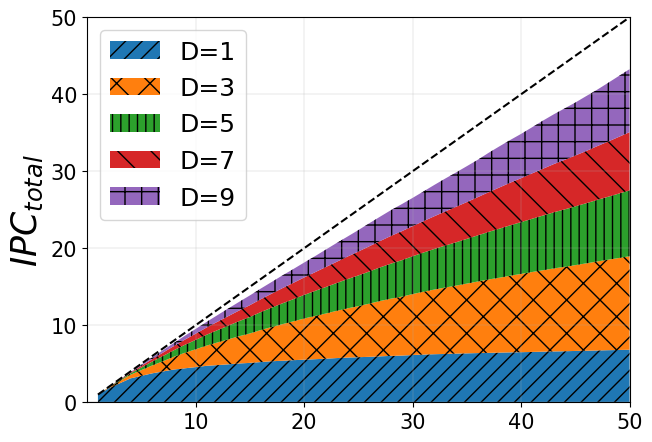

In [4]:
# Figure for stacked representation

ipc_list = np.load("data/ipc_reciprocal.npy")

fig = plt.figure(figsize=(7,5))
hatch_list  = ['//', 'x', '||', '\\', "+", ".."]

bottom = np.zeros([max_leadout])
upper = np.mean(ipc_list[:,:,0], axis=0)

for i in range(1, len(degree_list)+1):
    plt.fill_between(np.arange(1,max_leadout+1), bottom, upper, label=f"D={degree_list[i-1]}", hatch=hatch_list[i-1])
    bottom += np.mean(ipc_list[:,:,i-1], axis=0)
    if i<len(degree_list):
        upper += np.mean(ipc_list[:,:,i], axis=0)
plt.plot(np.arange(1,max_leadout+1),np.arange(1,max_leadout+1), color="black",linestyle="--")
plt.xticks([10,20, 30, 40, 50])
#plt.xlabel(r"$L$",fontsize=25)
plt.ylabel(r"$IPC_{total}$",fontsize=25)
plt.tick_params(labelsize=15)
plt.xlim(0,max_leadout)
plt.ylim(0,max_leadout)
plt.legend(fontsize=18)
#plt.title(f"Correlated: g={g}, eta={eta}, N={N}, sigma_s={sigma_s}, sigma_n={sigma_n}" )
plt.grid(linewidth=0.2)
plt.show()

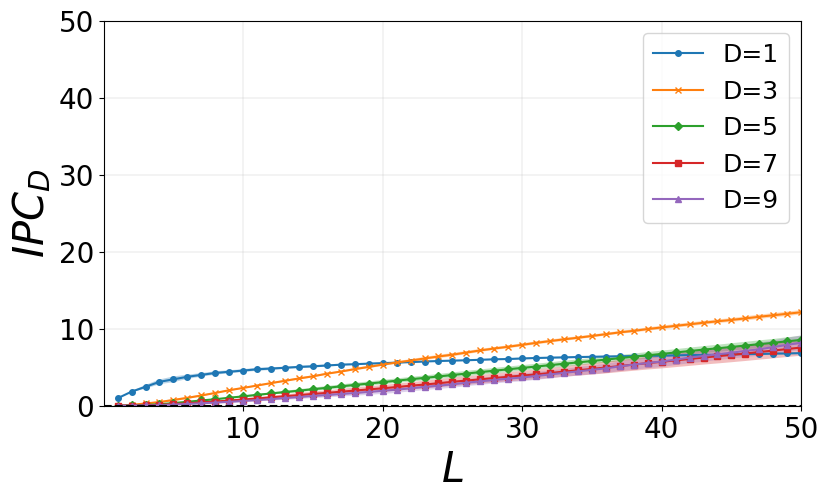

In [5]:
# Figure for each IPC_D curve

fig = plt.figure(figsize=(9,5))
markers =["o", "x", "D", "s", "^", ">"]
for i in range(0, len(degree_list)):
    plt.plot(np.arange(1,max_leadout+1), np.mean(ipc_list[:,:,i], axis=0), label=f"D={degree_list[i]}", marker=markers[i], markersize=4)
    plt.fill_between(np.arange(1,max_leadout+1), np.mean(ipc_list[:,:,i], axis=0)-np.std(ipc_list[:,:,i], axis=0),\
                                                np.mean(ipc_list[:,:,i], axis=0)+np.std(ipc_list[:,:,i], axis=0), alpha=0.3)

plt.xticks([10,20, 30, 40, 50])
plt.xlabel(r"$L$",fontsize=30)
plt.ylabel(r"$IPC_D$",fontsize=30)
plt.tick_params(labelsize=20)
plt.xlim(0,max_leadout)
plt.ylim(0,50)
plt.axhline(y=0, color="k", linestyle="--")
plt.legend(fontsize=18)
#plt.title(f"Gaussian: g={g}, N={N}, sigma_s={sigma_s}, sigma_n={sigma_n}" )
plt.grid(linewidth=0.2)
plt.show()

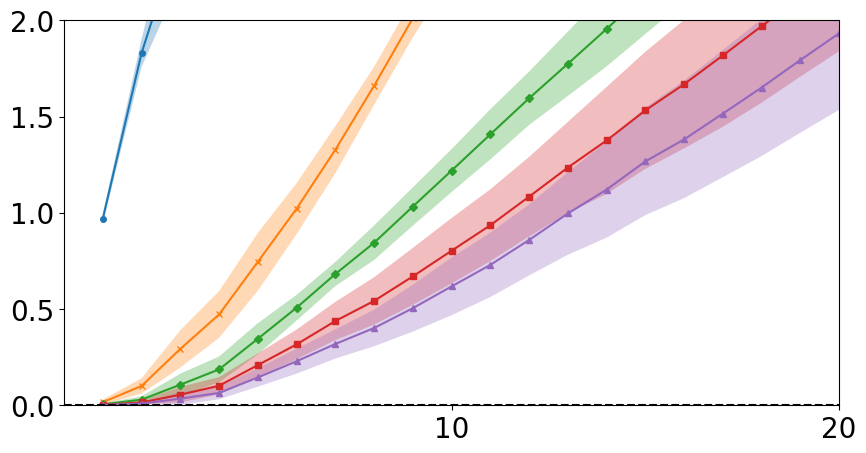

In [6]:
# Figure for enlarged view

fig = plt.figure(figsize=(10,5))
markers =["o", "x", "D", "s", "^", ">"]
for i in range(0, len(degree_list)):
    plt.plot(np.arange(1,max_leadout+1), np.mean(ipc_list[:,:,i], axis=0), label=f"D={degree_list[i]}", marker=markers[i], markersize=4)
    plt.fill_between(np.arange(1,max_leadout+1), np.mean(ipc_list[:,:,i], axis=0)-np.std(ipc_list[:,:,i], axis=0),\
                                                np.mean(ipc_list[:,:,i], axis=0)+np.std(ipc_list[:,:,i], axis=0), alpha=0.3)
plt.xticks([10,20, 30, 40, 50])
#plt.xlabel(r"$L$",fontsize=25)
#plt.ylabel(r"$IPC_D$",fontsize=25)
plt.tick_params(labelsize=20)
plt.xlim(0,20)
plt.ylim(0,2)
plt.axhline(y=0, color="k", linestyle="--")
#plt.title(f"Gaussian: g={g},N={N}, sigma_s={sigma_s}, sigma_n={sigma_n}" )
#plt.legend(fontsize=18)
plt.show()